
# Laboratorium przetwarzania obrazów i grafiki komputerowej

## Sesja 1 - Obrazy RGB

### Łódź 2017

#### Marek Kociński

#### Wymagania wstępne

Przed przystąpieniem do wykonytwania ćwiczeń należy powtórzyć materiał z przedmiotu *Postway programowania*; głównie zagadnienia dotyczące operacji na macierzach (obiekty typu *numpy.ndarray*) i wyświetlania obrazów (macierzy 2D) w bibliotece *matplotlib.pyplot*.

### Zadania do wykonania

#### 1. Obrazy do pracy podczas laboratrium

Ze [strony domowej przedmiotu](http://www.eletel.p.lodz.pl/med/pl/index.php?option=com_jotloader&view=categories&cid=99_b3c1de9aa6c8258566cc1b3370d1e750&Itemid=346) pobierz plik *lab1.zip*. Plik zapisz **w swoim katalogu roboczym** na dysku *D:\ *, a następnie rozpakuj. Użyj programu *7zip* lub polecenia systemowego *Wyodrębnij wszystkie...*.

#### 2. Program Fiji

Aplikacja  ma duże możliwości w zakresie przetważania obrazów. Program jest darmowy; pozwala na przetestowanie wielu algorytmów w odniesieniu do obrazów dwuwymiarowych (2D), a także trójwymiarowaych (3D). Daltego zanim zaczniesz własnoręcznie implementować wszystkie pomysły programistyczne sprawdź jakie rezultaty da obmyślony algorytm zastosowany do Twoich danych. Program jest zainstalowany na komputerach laboratoryjnch. Ikona umożliwiająca uruchomienie programu znajduje się na pulpicie komputera.

1. Uruchom program Fiji (ImageJ). Ikona do programu znajduje się na pulpicie komputera laboratoryjengo. Wczytaj dowolny obraz kolorowy (o trzech składowych RGB) z katalgu z danymi. Wykonaj poniższe operacje (w dowolnej kolejności), na jednym lub kilku obrazach z katalogu.
    - dokonaj zmian jasności i kontrastu (Image->Adjust->Brightness/Contrast),
    - wytnij wybraną część obrazu (Image->Crop),
    - zamień obraz na obraz w skali szarości (Image->Type),
    - wyświetl informacje o obrazie i jego właściwości (Image->Show Info, Image->Properties)
    - wyświetl histogram obrazu; odczytaj wartość minimalną jasności, wartość maksymalną, wartość średnią oraz odchylenie standardowe jasności (Analyze->Histogram),
    - zastosuj operację polepszenia kontrastu (Process->Enhacne Contrast...), zaznacz pola dotyczące rozciągania i normalizacji histogramu,
    - zastostuj filtr wykrywania krawędzi (Process->Find Edges..),    
    - zmniejsz liczbę pikseli w kolumnach i w wierszach (Image-Scale),
    - obróć obraz o 30 stopni zgodnie ze wskazówkami zegara (Image->Transform->Rotate),
    - zapisz obraz na dysku w formacie *bmp* (File->Save as).

#### 3. Importowanie pakietow potrzebnych podczas ćwiczenia

Zaimportuj wszystkie pakiety potrzebne do wykonania zadań.

In [1]:
import os
import numpy as np
import scipy.misc as misc
import matplotlib.pyplot as plt

#### 4. Wybór sposobu wyświetlania obrazów

Możliwe są dwa sposoby prezentacji wyników - w tym przypadku wyświetlanych obrazów. W pierszym wszystkie wyniki graficznę są umieszczane "wewnątrz" dokumentu (przydatne gdy tworzymy raport), w drugim, wykresy i obrazy pojawiają się w osobnych, zewnętrznych oknach (możemy modyfikować wykresy, a także zapisywać na dysk). Podczas wykonywania ćwiczenia sugerowana jest wyświetlanie wyników w **oknach zewnętrznych**.

In [2]:
# wyświetlanie w osobnym, niezależnym oknie
%matplotlib qt
# wyświetlanie wewnątrz dokumentu
#%matplotlib inline

#### 5. Importowanie własnych pakietów

Jeżeli korzystasz z własnych modułów lub pakietów również trzeba ja dołączyć.

**Pamiętaj!** do ponownego zaimportowania modułu nie wystarczy ponowne użycie słowa kluczowego *import* wraz z nazwą modułu. Trzeba "wymusić" ponowne załadowanie klas, funkcji, zmiennych zdefionowanych w utworzonej wcześniej bibliotece za pomocą runkcji *reload()*.

**Uwaga!** moduł *poigk_lab1.py* został napisany przez prowadzącego zajęcia i nie jest dostępny na komputerach Studenckich. W trackie zajęć można zapisać tworzone funkcje we własnych modlułach w celu ich późniejszego, wielokrotnego wykorzystania. Nie należy importować pakietu *poigk_lab1* podczas pracy na laboratoriach.

In [3]:
import poigk_lab1 as poigk
reload(poigk)

<module 'poigk_lab1' from 'poigk_lab1.pyc'>

#### 6. Wczytanie i wyświetlenie obrazu z pliku dyskowego

Wczytaj jeden z obrazów kolorowych (np. *coimbra.png*). Do tego celu zastosuj funkcję *imread()* z pakietu *scipy.misc*. Zapoznaj się z możliwościami funkcji *imread()* i możliwymi argumentami jakie można przekazać do funkcji. Wyświetl obraz za pomocą funkcji *imshow()* z pakietu *matplotlib.pyplot (plt)*. 

In [4]:
# pliki z obrazami RGB dostępne w katalogu z danymi:

# bergen.png, coimbra.png, czocha1.png, czocha2.png, fjordy.png, floyen2.png,
# floyen.png, las_vegas.png, norway.png, ogrodzieniec.png, rovinj.png,
# shonbrunn1.png, shonbrunn2.png, shonbrunn3.png, shonbrunn4.png, shonbrunn5.png,
# stozek.png, swieradow.png,tampere.png, ulriken1.png, ulriken2.png,
# wieden1.png, wieden2.png, wisla.png


filename = 'czocha1'
filenameext = filename + '.png'
filepath = os.path.join('lab1_dane',filenameext)
im_o = misc.imread(filepath)

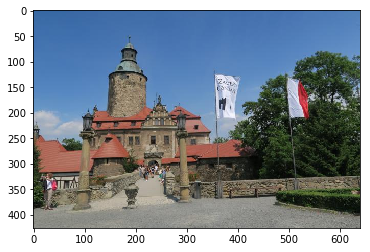

In [5]:
# wyświetlenie obrazu
plt.imshow(im_o)
plt.show()

#### 7. Wypisanie informacji o wczytanym obrazie

Wypisz w oknie konsoli podstawowe informacje o obrazie:
- wartość minimalna,
- wartość średnia,
- wartość maksymalna,
- rozmiar obrazu,
- typ elementów obrazu.

W tym celu napisz funkcję *imginfo(img,name='obrazek')* która pobiera dwa argumetny; pierwszy (*img*) to badany obraz (macierz 2D), a drugi (*name*) służy do ewentualnego wyświetlenia nazwy obrazu. Wewnątrz projektowanej funkcji wykorzystaj metodę *format()*, która działa na obiektach typu *String*. Wyświetlanie wartości średniej w obrazie sformatuj tak, aby dokładność była ograniczona do dwóch miejsc po przecinku.

Zwróć uwagę na typ danyh oraz na wartości minimalne i maksymalne w obrazie.

**UWAGA!!!** funkcja *imginfo()* jest funkcją napisaną przez prowadzącego. Definicja i ciało funkcji znajdują się  w module o nazwie *poigk_obrazy2d.py*. Zadaniem Studentów jest napisanie funkcji o takim samym działaniu.

In [6]:
poigk.imginfo(im_o, name='Widok')

info o WIDOK: min=0, aver=108.39,  max=255.00, shape=(426, 640, 3), dtype=uint8


#### 8. Podział obrazu RGB na poszczególne składowe kolorów

Wydziel z obrazu RGB składowe poszczególnych kolorów: R,G,B; następnie wyświetl je oddzielnie obok siebie - jak na rysunku poniżej. W tym celu napisz funkcję *imshow3()*. Funkcja powinna pobierać trzy macierze (obrazy) do wyświetlenia np. zgrupowane jako kolejne elementy obiektu typu *Lista*, powinna również mieć możliwość wyświetlenia tytułów poszczególnych obrazów. Obrazy powinny być wyświetlane w skali szarości. 

**UWAGA!!!** funkcja *imshow3()* jest funkcją napisaną przez prowadzącego i zapisana w module o nazwie *poigk_lab1*. Zadaniem Studentów jest napisanie funkcji o takim samym działaniu.

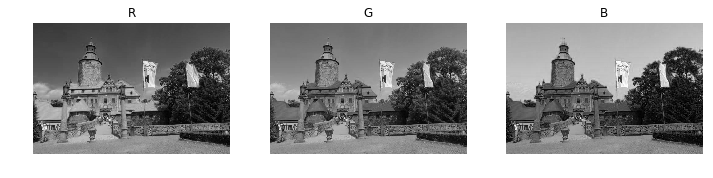

In [7]:
r,g,b = im_o[:,:,0], im_o[:,:,1],im_o[:,:,2]

poigk.imshow3([r,g,b],show_axis='off',titles=['R','G','B'])

Przeanalizuj udział poszczególnych składowych w obrazie RGB. Sprawdź w których obszarach obrazu RGB składowa R ma wartośći największe, a w których dominują B i G? W tym celu możesz jednocześnie wyświetlić również obraz RGB. Po wyświetleniu obrazu RGB w oknie zewnętrznym, w belce informacyjnej u dolu okna, wyświetlana jest informacja o aktualnym położeniu kursora wewnątrz obrazu, a także o jasności piksele na który wskazuje kursor.

W celu wyświetlenia czterech obrazów (jak poniżej) napisz funkcję *imshow4()*. Funkcjonalność ma być taka sama jak dla funkcji *imshow3()*.

**UWAGA!!!** funkcja *imshow4()* jest funkcją napisaną przez prowadzącego i zapisana w module o nazwie *poigk_lab1*. Zadaniem Studentów jest napisanie funkcji o takim samym działaniu.

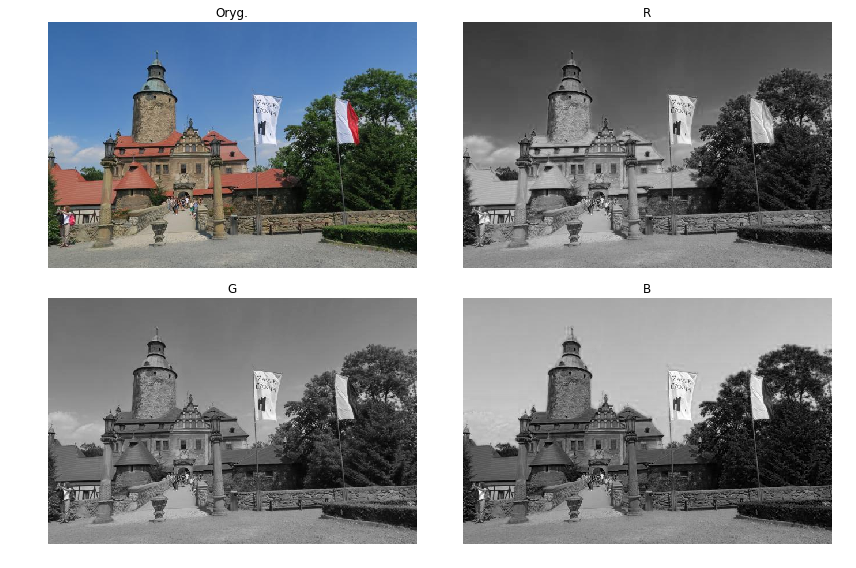

In [8]:
poigk.imshow4([im_o,r,g,b],show_axis='off',titles=['Oryg.','R','G','B'])

---

#### 9. Wyświetlenie odesparowanych składowych  RGB w "naturalnych" kolorach

Wyświetl składowe kolorów R,G i B w "naturalnych" kolorach. W tym celu dla każdej składowej koloru utwórz obraz wypełniony zerami o rozmiarze *wys x szer x 3*; przypisz wartości składowej R do "kanału" pierwszego, składowej G do kanału drugiego, a składowej B do trzeciego w kolejnych obrazach. Aby działanie to było powtarzalne napisz funkcję *separateChannels()*. Argumentem funkcji jest oryginalny obraz RGB. Funkcja zwaraca 3 obrazy RGB z poszczególnymi składowymi kolorów każdy.

Powinieneś uzyskać efekt jak na rysunku poniżej. Do wyświetlania wykorzystaj napisaną funkcję *imshow3()*. Nadaj obrazom odpowiednie tytuły.


In [9]:
rgb_r, rgb_g, rgb_b = poigk.separateChannels(im_o)

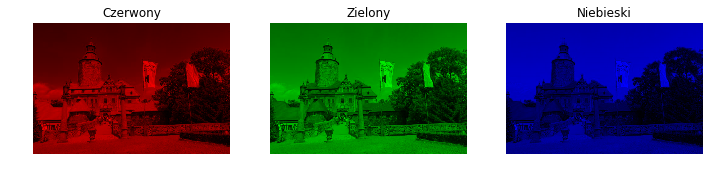

In [10]:
poigk.imshow3([rgb_r,rgb_g,rgb_b],show_axis='off',titles=['Czerwony','Zielony','Niebieski'])

#### 10. Zamiana kolejnośći składowych z RGB na BGR

Zmień kolejność barw. Zinterpretuj zaobserwowane zmiany.

Wyświetl dwa obrazy obok siebie. W tym celu napisz funkcję *imshow2()* o funkcjonalności takiej jak w funkcjach *imahow3()* i *imshow4()*.

**UWAGA!!!** funkcja *imshow2()* jest funkcją napisaną przez prowadzącego i zapisana w module o nazwie *poigk_obrazy2d.py*. Zadaniem Studentów jest napisanie funkcji o takim samym działaniu.

In [11]:
im_bgr = np.zeros_like(im_o)
im_bgr[:,:,0] = b
im_bgr[:,:,1] = g
im_bgr[:,:,2] = r

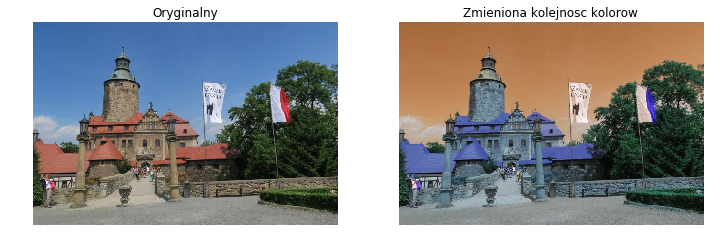

In [12]:
plt.figure()
poigk.imshow2([im_o,im_bgr],show_axis='off', titles=['Oryginalny', 'Zmieniona kolejnosc kolorow'])

#### 11. Zamiana obrazu RGB na obraz monochromatyczny

Zamień obraz RGB na obraz monochromatyczny. W tym celu napisz funkcję *rgb2mono()* która wykorzystuje dwie pętle *for*. Aby obliczyć jasność każdego elementu obrazu (piksela) zastosuj odpowiednią zależność pomiędzy składowymi obrazu (Wikipedia [grayscale](https://en.wikipedia.org/wiki/Grayscale)). Argumentem funkcji jest obraz RGB, funkcja zwraca obraz w skali szarości. Wewnątrz funkcji musisz wydzielić poszczególne składowe z obrazu kolorowego, a także zaalokować pamięć na obraz wynikowy. Zadbaj aby typy danych w obu obrazach (źródłowym i wynikowym) były takie same.


Wyświetl oba obrazy obok siebie z odopowienimi tytułami. Zastosuj funkcję *imshow2()*. Przy pomocy funkcji *imginfo()* wypisz informacje o obydwu obrazach: RGB i monochromatycznym.

In [13]:
gray = poigk.rgb2mono(im_o)

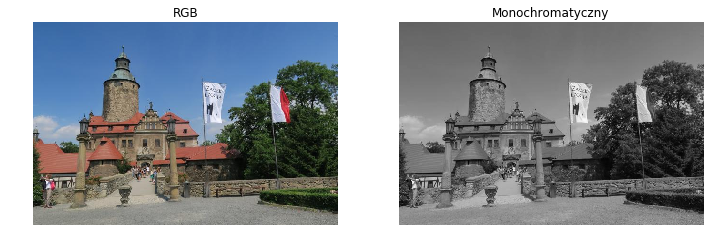

info o RGB: min=0, aver=108.39,  max=255.00, shape=(426, 640, 3), dtype=uint8
info o MONO: min=0, aver=106.09,  max=253.00, shape=(426, 640), dtype=uint8


In [14]:
poigk.imshow2([im_o,gray],show_axis='off',titles=['RGB', "Monochromatyczny"])
poigk.imginfo(im_o, 'rgb')
poigk.imginfo(gray, 'mono')

Dokonaj podobnej konwersji stosując **konwencję macierzową**. W celu ułatwienia obliczń przed zamianą na obraz monochromatyczny skorzystaj z odseparowanych składowych R,G i B. 


Wyświetl obrazy obok siebie (funkcja *imshow2()*), zwróc uwagę na typ elementów w obrazie przed konwersją i w obrazie wynikowym.

In [15]:
r,g,b = im_o[:,:,0], im_o[:,:,1], im_o[:,:,2]  

In [16]:
gray2 =  0.2126*r + 0.7152*g + 0.0722*b

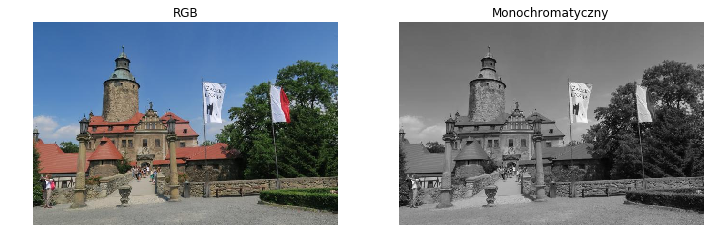

info o RGB: min=0, aver=108.39,  max=255.00, shape=(426, 640, 3), dtype=uint8
info o MONO2: min=0.0, aver=106.57,  max=253.65, shape=(426, 640), dtype=float64


In [17]:
poigk.imshow2([im_o,gray2],show_axis='off',titles=['RGB', "Monochromatyczny"])
poigk.imginfo(im_o, 'rgb')
poigk.imginfo(gray2, 'mono2')

#### 12. Porównanie czasu zamiany obrazu RGB na obraz monochromatyczny

Za pomocą funkcji magicznej *%timeit%* zmierz czas zamiany obrazu RGB na obraz w skali szarości. Porównaj czasy zamiany dla metody opartej na obliczeniach macierzowych oraz z wykorzystaniem dwóch pętli *for*. Jakie wartości otrzymałaś/otrzymałes? Jak długo trwa zamiana tego obrazu? Która metoda jest szybsza i o ile razy? Dokonaj pomiarów dla kilku wybranych obrazów z katalogu z danymi.

In [18]:
%timeit gray2 =  0.2126*r + 0.7152*g + 0.0722*b

100 loops, best of 3: 1.53 ms per loop


In [19]:
%timeit gray_uint8 = poigk.rgb2mono(im_o)

1 loop, best of 3: 1.87 s per loop


#### 13. Automatyczna konwersja obrazu RGB do skali szarości z wykorzystaniem funkcji *imread()*

Przeczytaj opis funkcji *misc.imread()*. Zwróc uwagę na fakt, że podczas wczytywania obrazu RGB możliwa jest automatyczna konwersja obrazu RGB do obrazu w skali szarości. Jaki argument funkcji na to pozwala? Jaką powinien mieć wartość? Zanim przejdziesz dalej samodzielnie znajdź informację na ten temat.

Następnie dokonaj automatycznej zamiany obrazu RGB do obrazu w skali szarości podczas wczytywania dowolnego zdjęcia z katalogu *lab1_dane* stosując funkcję *misc.imread()*.

Wyświetl obraz i wypisz informacje o nim stosując funkcję *imginfo()*. Porównaj parametry dla obrazu zamienionego automatycznie z parametrami obrazów zamienionych w poprzednich punkach ćwiczenia (dwie pętle for i konwencja macierzowa). Co możesz powiedzieć o warościach: minimalnej, średniej i maksymalnej? Jak wytłumaczyć te niewielkie różnice? Zwróć uwagę na typ obrazu wynikowego we wszystkich trzech przypadkach.

In [20]:
loadfile = os.path.join('lab1_dane',filename+'.png')
im_gray = misc.imread(loadfile,flatten=True)

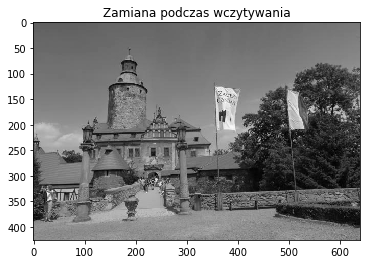

In [21]:
plt.imshow(im_gray,cmap='gray',interpolation='None')
plt.title('Zamiana podczas wczytywania')
plt.show()

In [22]:
poigk.imginfo(im_gray)

info o OBRAZEK: min=0.0, aver=105.98,  max=253.83, shape=(426, 640), dtype=float32


#### 14. Zapis obrazu do pliku dyskowego

Zapoznaj sie z opisem funkcji *misc.imsave()*. Zapisz obraz na który wskazuje zmienna *im_gray* na dysk do swojego katalogu roboczego. Sprawdź dostępne formaty plików jakie są akceptowane przez ww. funkcję.

In [23]:
savename = filename + '_gray'
savefile = os.path.join('lab1_dane',savename+'.png')
misc.imsave(savefile, im_gray)

#### 15. Wczytywanie i zapis obrazu z wykorzystaniem biblioteki *matplotlib.pyplot*

Wczytaj wybrany obraz RGB z użyciem biblioteki *matplotlib.pyplot()*. Wypisz podstawowe informację o obrazie. Jaka jest różnica? Co możesz powiedzieć o działaniu funkcji *imread()* z bibliotek *misc* i *plt*? Porównaj wartości w obrazie po wczytaniu za pomocą obu bibliotek z informacjami pozyskanymi z programu ImageJ-Fiji. Jaki zakres wartości jasności i typ danych jest odczytany w programie ImageJ-Fiji?

Wyświetl obraz.

In [24]:
loadfile = os.path.join('lab1_dane',filename+'.png')
im_plt = plt.imread(loadfile)
poigk.imginfo(im_plt,'PLT-RGB')

info o PLT-RGB: min=0.0, aver=0.43,  max=1.00, shape=(426, 640, 3), dtype=float32


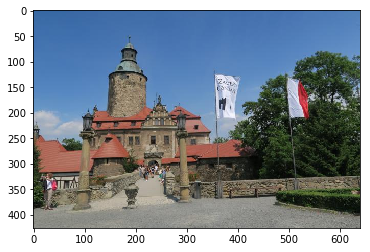

In [25]:
plt.imshow(im_plt)

Wczytaj obraz *stożek.png* do zmiennej *st_rgb*. Zamień go do obrazu monochromatycznego, wynik zamiany zapisz w zmiennej *st_mono*. 

Wyświetl oba obrazy obok siebie.


Wypisz informacje o obrazach *st_rgb* i *st_mono*.

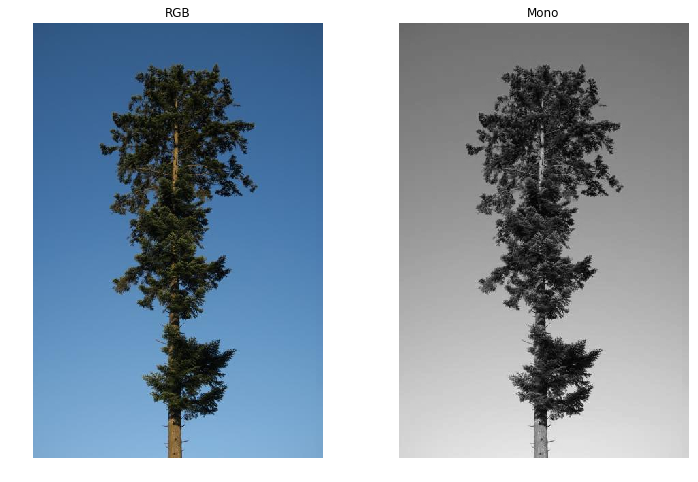

In [26]:
filename = 'stozek'
loadfile = os.path.join('lab1_dane',filename +'.png')
st_rgb= plt.imread(loadfile)

st_mono = poigk.rgb2mono(st_rgb)

poigk.imshow2([st_rgb, st_mono],titles=['RGB', 'Mono'],show_axis='off')

In [27]:
poigk.imginfo(st_rgb,'st-rgb')
poigk.imginfo(st_mono,'st-mono')

info o ST-RGB: min=0.0, aver=0.43,  max=0.93, shape=(640, 426, 3), dtype=float32
info o ST-MONO: min=0.0, aver=0.41,  max=0.76, shape=(640, 426), dtype=float32


Wyświetl obraz *st_mono* w kilku różnych mapach kolorów:
- gray
- hot
- sepctral
- winter

Pełna lista kolorów jest dostępna na stronie domowej biblioteki [matplotlib.org](http://matplotlib.org/examples/color/colormaps_reference.html).

A następnie zapisz ten obraz do pliku z zachowaniem powyższych map kolorów.


**UWAGA!!!** funkcja *imshow4_raw()* jest funkcją napisaną przez prowadzącego i zapisana w module o nazwie *poigk_obrazy2d.py*. Jest to zmodyfikowana wersja funkcji *imshow4()*.

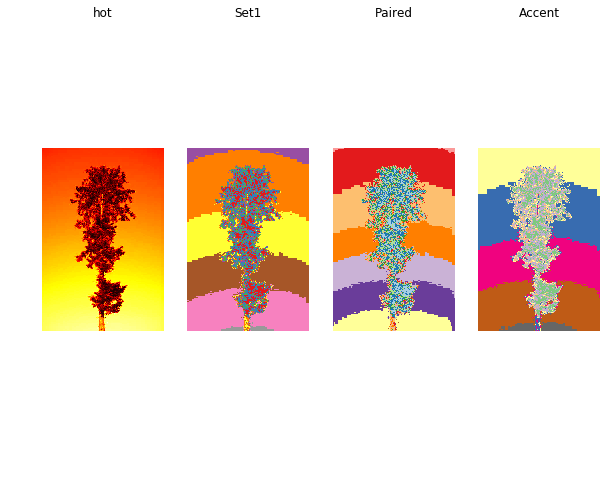

In [28]:
colors=['hot','Set1','Paired','Accent']
poigk.imshow4_raw([st_mono,st_mono,st_mono,st_mono],cmap=colors,titles=colors,show_axis='off')

In [29]:
for c in colors:
    savename = filename + '_' + c
    savefile = os.path.join('lab1_dane',savename + '.png')
    plt.imsave(savefile,st_mono,cmap=c)

#### Zadania dodatkowe do wykonania podczas zajęc lub w domu

1. Powtórz cwiczenie 4 (*Wyświetlanie obrazów. Funkcja imshow()*) z przedmiotu *Podstawy programowania* 
1. Wyświetl wczytany obrazek - wykorzystaj funkcję *imshow()* z pakietu *matplotlib.pyplot*. 
1. Sprawdź:
    1. w jakiego typu strukturze danych jest przechowywany wczytany obraz?
    1. jakiego typu są poszczególne elementy obrazu?
    1. zarkesy wartości zmiennych typu: uint, int, float dla 8, 16, 32, 64 bitów. Do tego celu wykorzystaj funkcję *iinfo()* (z pakietu *numpy*).
    1. gdzie znajduje się element obrazu o indeksie [0,0]?
    1. sprawdż jak jest usytuowany środek każdego elemetnu obrazu (piksela) podczas wyświetlania za pomocą biblioteki *matplotlib.pyplot*. Aby dobrze wykonać to polecenie zastosuj obraz (wycinek obrazu) o małej liczbie wierszy i kolumn (np. 5x8).    

#### Ostatnia aktualizacja: 25.03.2017